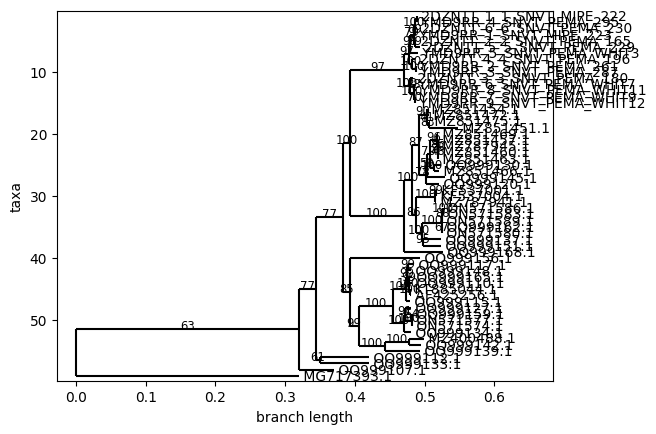

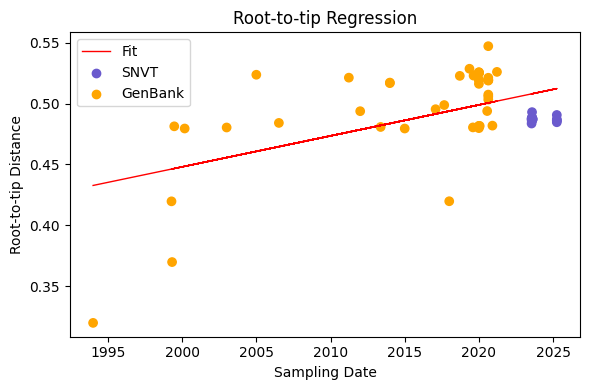

Slope (substitutions/site/year): 2.5445e-03, R²: 0.273, p-value: 2.191e-05, Intercept: 1823.93600


In [30]:
import xml.etree.ElementTree as ET
from Bio import Phylo
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def parse_beast_tipdates_prefix(xml_path):
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_path)
    root = tree.getroot()
    tipdates = {}
    for taxon in root.findall(".//taxon"):
        taxon_id = taxon.attrib.get('id')
        if taxon_id is None:
            continue
        # Get prefix before "|" if present, else use full string
        taxon_prefix = taxon_id.split('|')[0].strip() if '|' in taxon_id else taxon_id.strip()
        for child in taxon:
            if child.tag.lower().endswith('date') and 'value' in child.attrib:
                try:
                    tipdates[taxon_prefix] = float(child.attrib['value'])
                except Exception:
                    pass
    return tipdates

tipdates = parse_beast_tipdates_prefix("../Avail_seqs/aligned/SNV_L_NCBI_MEZAP.aligned.xml")

def get_root_to_tip(tree):
    dists = {}
    for tip in tree.get_terminals():
        path = tree.get_path(tip)
        dist = sum(node.branch_length for node in path if node.branch_length)
        dists[tip.name] = dist
    return dists

from Bio import Phylo

def reroot_with_outgroup(tree, outgroup_name):
    # Find the path from root to outgroup tip
    outgroup_tip = [tip for tip in tree.get_terminals() if outgroup_name in tip.name][0]
    path = tree.get_path(outgroup_tip)
    if not path:
        raise ValueError("Outgroup not found in the tree.")
    # Find the parent of outgroup tip
    parent = path[-2] if len(path) > 1 else tree.root
    # Find the branch length to the outgroup tip
    for clade in parent.clades:
        if clade == outgroup_tip:
            branch_length = clade.branch_length
            break
    else:
        branch_length = 0.0
    # Root the tree at this branch (midpoint)
    tree.root_with_outgroup(outgroup_tip)
    # Optionally, set the outgroup tip's branch length to half original (if you want the root at midpoint)
    if branch_length:
        outgroup_tip.branch_length = branch_length / 2
        if parent != tree.root:
            parent.branch_length = branch_length / 2
    return tree


tree = Phylo.read("../Avail_seqs/aligned/snvLRna.contree", "newick")
reroot_with_outgroup(tree, 'MG717393.1')
Phylo.draw(tree, do_show=False)
dists = get_root_to_tip(tree)

def clean_tip_label(tiplabel):
    return tiplabel.strip("'").strip('"').strip()

data = []
for tip in tree.get_terminals():
    tip_clean = clean_tip_label(tip.name)
    tip_prefix = tip_clean.split('|')[0].strip()
    if tip_prefix in tipdates:
        data.append({
            'tip': tip_clean,
            'root_to_tip': dists[tip.name],
            'date': tipdates[tip_prefix],
            'WHIT': 'YES' if 'SNVT' in tip.name else 'NO'
        })
df = pd.DataFrame(data)

slope, intercept, r_value, p_value, std_err = linregress(df['date'], df['root_to_tip'])

# Create a color column
df['color'] = np.where(df['WHIT'] == 'YES', 'slateblue', 'orange')

plt.figure(figsize=(6,4))
plt.scatter(df['date'], df['root_to_tip'], c=df['color'], label=None)
plt.plot(df['date'], intercept + slope*df['date'], color='red', lw=1, label="Fit")
for group, color in zip(['YES', 'NO'], ['slateblue', 'orange']):
    plt.scatter([], [], c=color, label=f'{"SNVT" if group=="YES" else "GenBank"}')
plt.xlabel("Sampling Date")
plt.ylabel("Root-to-tip Distance")
plt.title("Root-to-tip Regression")
plt.legend()
plt.tight_layout()
plt.show()

x_intercept = -intercept / slope

print(f"Slope (substitutions/site/year): {slope:.4e}, R²: {r_value**2:.3f}, p-value: {p_value:.4g}, Intercept: {x_intercept:.5f}")

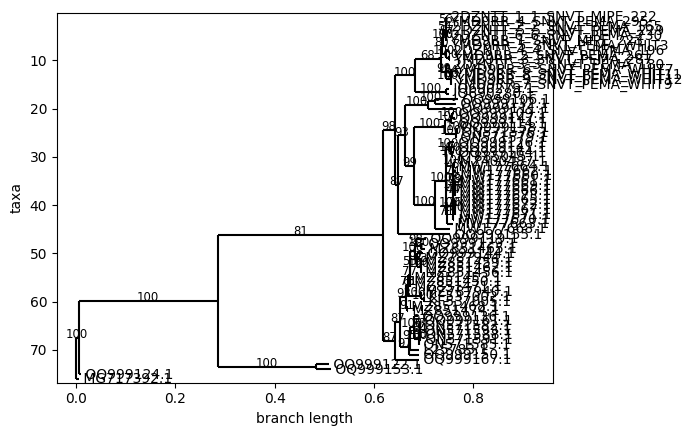

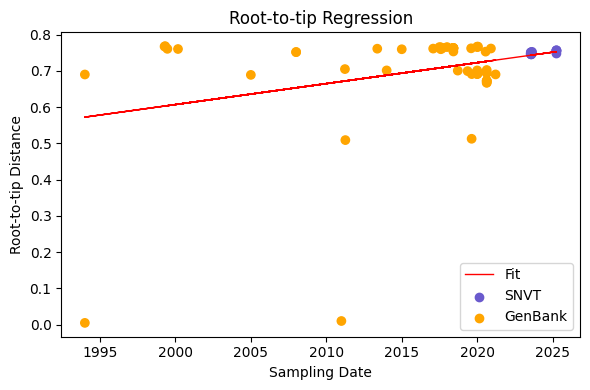

Slope (substitutions/site/year): 5.7753e-03, R²: 0.106, p-value: 0.004088, Intercept: 1894.87682


,tip,root_to_tip,date,WHIT,color
0,2DZNTT_1_1_SNVT_MIPE_222,0.746045,2023.580000,YES,slateblue
1,YMD9RR_4_SNVT_PEMA_295,0.745665,2023.580000,YES,slateblue
2,2DZNTT_2_2_SNVT_PEMA_165,0.746623,2023.540000,YES,slateblue
3,2DZNTT_5_5_SNVT_PEMA_229,0.750565,2023.580000,YES,slateblue
4,2DZNTT_6_6_SNVT_PEMA_230,0.747117,2023.580000,YES,slateblue
...,...,...,...,...,...
71,OQ999167.1,0.690213,2021.216438,NO,orange
72,OQ999122.1,0.509145,2011.263014,NO,orange
73,OQ999153.1,0.512752,2019.630137,NO,orange
74,OQ999124.1,0.010306,2011.000000,NO,orange


In [34]:
import xml.etree.ElementTree as ET
from Bio import Phylo
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def parse_beast_tipdates_prefix(xml_path):
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_path)
    root = tree.getroot()
    tipdates = {}
    for taxon in root.findall(".//taxon"):
        taxon_id = taxon.attrib.get('id')
        if taxon_id is None:
            continue
        # Get prefix before "|" if present, else use full string
        taxon_prefix = taxon_id.split('|')[0].strip() if '|' in taxon_id else taxon_id.strip()
        for child in taxon:
            if child.tag.lower().endswith('date') and 'value' in child.attrib:
                try:
                    tipdates[taxon_prefix] = float(child.attrib['value'])
                except Exception:
                    pass
    return tipdates

tipdates = parse_beast_tipdates_prefix("../Avail_seqs/aligned/SNV_M_NCBI_MEZAP.aligned.xml")

def get_root_to_tip(tree):
    dists = {}
    for tip in tree.get_terminals():
        path = tree.get_path(tip)
        dist = sum(node.branch_length for node in path if node.branch_length)
        dists[tip.name] = dist
    return dists

from Bio import Phylo

def reroot_with_outgroup(tree, outgroup_name):
    # Find the path from root to outgroup tip
    outgroup_tip = [tip for tip in tree.get_terminals() if outgroup_name in tip.name][0]
    path = tree.get_path(outgroup_tip)
    if not path:
        raise ValueError("Outgroup not found in the tree.")
    # Find the parent of outgroup tip
    parent = path[-2] if len(path) > 1 else tree.root
    # Find the branch length to the outgroup tip
    for clade in parent.clades:
        if clade == outgroup_tip:
            branch_length = clade.branch_length
            break
    else:
        branch_length = 0.0
    # Root the tree at this branch (midpoint)
    tree.root_with_outgroup(outgroup_tip)
    # Optionally, set the outgroup tip's branch length to half original (if you want the root at midpoint)
    if branch_length:
        outgroup_tip.branch_length = branch_length / 2
        if parent != tree.root:
            parent.branch_length = branch_length / 2
    return tree


tree = Phylo.read("../Avail_seqs/aligned/snvMRna.contree", "newick")
reroot_with_outgroup(tree, 'MG717392.1')
Phylo.draw(tree, do_show=False)
dists = get_root_to_tip(tree)

def clean_tip_label(tiplabel):
    return tiplabel.strip("'").strip('"').strip()

data = []
for tip in tree.get_terminals():
    tip_clean = clean_tip_label(tip.name)
    tip_prefix = tip_clean.split('|')[0].strip()
    if tip_prefix in tipdates:
        data.append({
            'tip': tip_clean,
            'root_to_tip': dists[tip.name],
            'date': tipdates[tip_prefix],
            'WHIT': 'YES' if 'SNVT' in tip.name else 'NO'
        })
df = pd.DataFrame(data)

slope, intercept, r_value, p_value, std_err = linregress(df['date'], df['root_to_tip'])

# Create a color column
df['color'] = np.where(df['WHIT'] == 'YES', 'slateblue', 'orange')

plt.figure(figsize=(6,4))
plt.scatter(df['date'], df['root_to_tip'], c=df['color'], label=None)
plt.plot(df['date'], intercept + slope*df['date'], color='red', lw=1, label="Fit")
for group, color in zip(['YES', 'NO'], ['slateblue', 'orange']):
    plt.scatter([], [], c=color, label=f'{"SNVT" if group=="YES" else "GenBank"}')
plt.xlabel("Sampling Date")
plt.ylabel("Root-to-tip Distance")
plt.title("Root-to-tip Regression")
plt.legend()
plt.tight_layout()
plt.show()

x_intercept = -intercept / slope

print(f"Slope (substitutions/site/year): {slope:.4e}, R²: {r_value**2:.3f}, p-value: {p_value:.4g}, Intercept: {x_intercept:.5f}")
df

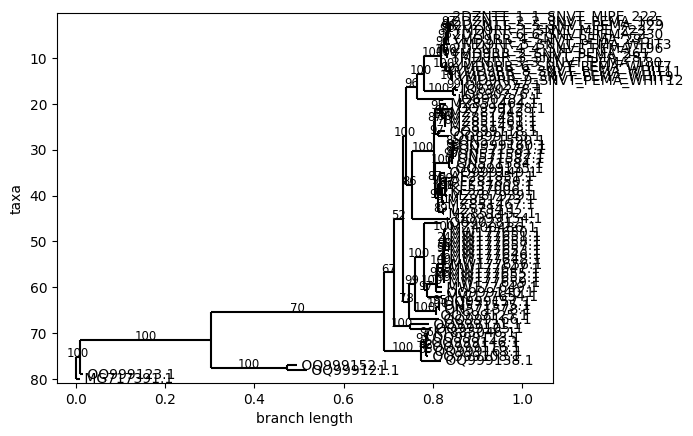

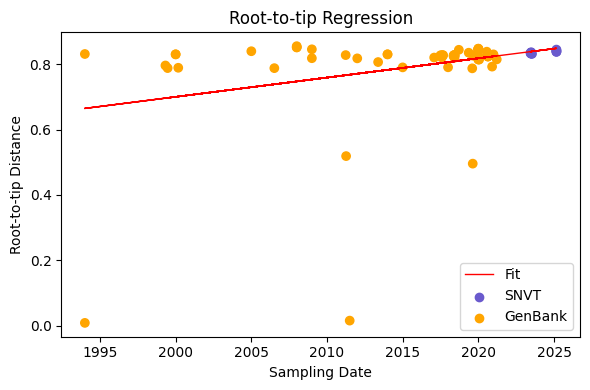

Slope (substitutions/site/year): 5.9013e-03, R²: 0.102, p-value: 0.003866, Intercept: 1881.33294


,tip,root_to_tip,date,WHIT,color
0,2DZNTT_1_1_SNVT_MIPE_222,0.833219,2023.490000,YES,slateblue
1,2DZNTT_2_2_SNVT_PEMA_165,0.834852,2023.450000,YES,slateblue
2,2DZNTT_5_5_SNVT_PEMA_229,0.836845,2023.490000,YES,slateblue
3,YMD9RR_1_SNVT_MIPE_223,0.835251,2023.490000,YES,slateblue
4,2DZNTT_6_6_SNVT_PEMA_230,0.834744,2023.490000,YES,slateblue
...,...,...,...,...,...
75,OQ999138.1,0.818081,2012.000000,NO,orange
76,OQ999152.1,0.495799,2019.630137,NO,orange
77,OQ999121.1,0.518927,2011.263014,NO,orange
78,OQ999123.1,0.015324,2011.500000,NO,orange


In [36]:
import xml.etree.ElementTree as ET
from Bio import Phylo
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def parse_beast_tipdates_prefix(xml_path):
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_path)
    root = tree.getroot()
    tipdates = {}
    for taxon in root.findall(".//taxon"):
        taxon_id = taxon.attrib.get('id')
        if taxon_id is None:
            continue
        # Get prefix before "|" if present, else use full string
        taxon_prefix = taxon_id.split('|')[0].strip() if '|' in taxon_id else taxon_id.strip()
        for child in taxon:
            if child.tag.lower().endswith('date') and 'value' in child.attrib:
                try:
                    tipdates[taxon_prefix] = float(child.attrib['value'])
                except Exception:
                    pass
    return tipdates

tipdates = parse_beast_tipdates_prefix("../Avail_seqs/aligned/SNV_S_NCBI_MEZAP.aligned.xml")

def get_root_to_tip(tree):
    dists = {}
    for tip in tree.get_terminals():
        path = tree.get_path(tip)
        dist = sum(node.branch_length for node in path if node.branch_length)
        dists[tip.name] = dist
    return dists

from Bio import Phylo

def reroot_with_outgroup(tree, outgroup_name):
    # Find the path from root to outgroup tip
    outgroup_tip = [tip for tip in tree.get_terminals() if outgroup_name in tip.name][0]
    path = tree.get_path(outgroup_tip)
    if not path:
        raise ValueError("Outgroup not found in the tree.")
    # Find the parent of outgroup tip
    parent = path[-2] if len(path) > 1 else tree.root
    # Find the branch length to the outgroup tip
    for clade in parent.clades:
        if clade == outgroup_tip:
            branch_length = clade.branch_length
            break
    else:
        branch_length = 0.0
    # Root the tree at this branch (midpoint)
    tree.root_with_outgroup(outgroup_tip)
    # Optionally, set the outgroup tip's branch length to half original (if you want the root at midpoint)
    if branch_length:
        outgroup_tip.branch_length = branch_length / 2
        if parent != tree.root:
            parent.branch_length = branch_length / 2
    return tree


tree = Phylo.read("../Avail_seqs/aligned/snvSRna.contree", "newick")
reroot_with_outgroup(tree, 'MG717391.1')
Phylo.draw(tree, do_show=False)
dists = get_root_to_tip(tree)

def clean_tip_label(tiplabel):
    return tiplabel.strip("'").strip('"').strip()

data = []
for tip in tree.get_terminals():
    tip_clean = clean_tip_label(tip.name)
    tip_prefix = tip_clean.split('|')[0].strip()
    if tip_prefix in tipdates:
        data.append({
            'tip': tip_clean,
            'root_to_tip': dists[tip.name],
            'date': tipdates[tip_prefix],
            'WHIT': 'YES' if 'SNVT' in tip.name else 'NO'
        })
df = pd.DataFrame(data)

slope, intercept, r_value, p_value, std_err = linregress(df['date'], df['root_to_tip'])

# Create a color column
df['color'] = np.where(df['WHIT'] == 'YES', 'slateblue', 'orange')

plt.figure(figsize=(6,4))
plt.scatter(df['date'], df['root_to_tip'], c=df['color'], label=None)
plt.plot(df['date'], intercept + slope*df['date'], color='red', lw=1, label="Fit")
for group, color in zip(['YES', 'NO'], ['slateblue', 'orange']):
    plt.scatter([], [], c=color, label=f'{"SNVT" if group=="YES" else "GenBank"}')
plt.xlabel("Sampling Date")
plt.ylabel("Root-to-tip Distance")
plt.title("Root-to-tip Regression")
plt.legend()
plt.tight_layout()
plt.show()

x_intercept = -intercept / slope

print(f"Slope (substitutions/site/year): {slope:.4e}, R²: {r_value**2:.3f}, p-value: {p_value:.4g}, Intercept: {x_intercept:.5f}")
df